# Amazing RL Agent

In [37]:
import gymnasium as gym
import torch
import numpy as np
import importlib

# Render screen, set to false if training
RENDER_AGENT = True


In [38]:
# Test pytorch is working

x = torch.rand(size=(1000,))
x = x + 1

# If you have a nvidia gpu with torch installed correctly
# you can move the tensors to the gpu for some extra
# speed, not necessary although.
DEVICE = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"Using {DEVICE}")
# When creating a new tensor make sure you move it to a
# device using .to(DEVICE), such as:
x = x.to(DEVICE)
# The tensor in x has been moved to the device


Using cpu


In [48]:
# Import agent
import agents

# Reload module as jupyter notebooks wont update to any changes youve made
importlib.reload(
    agents
)
#agent = agents.Agent()

agent = agents.TD3(3, 1, 2)
scores = []
import matplotlib.pyplot as plt


Episode: 0, Reward: -1168.286376953125, Memory Size: 200
Episode: 10, Reward: -1762.4970703125, Memory Size: 2200
Episode: 20, Reward: -1050.531494140625, Memory Size: 4200
Episode: 30, Reward: -1082.5899658203125, Memory Size: 6200
Episode: 40, Reward: -1432.4053955078125, Memory Size: 8200
Episode: 50, Reward: -1053.1929931640625, Memory Size: 10200
Episode: 60, Reward: -1045.1036376953125, Memory Size: 12200
Episode: 70, Reward: -923.7015380859375, Memory Size: 14200
Episode: 80, Reward: -949.1049194335938, Memory Size: 16200
Episode: 90, Reward: -909.7698364257812, Memory Size: 18200
Episode: 100, Reward: -909.3790893554688, Memory Size: 20200
Episode: 110, Reward: -853.6674194335938, Memory Size: 22200
Episode: 120, Reward: -930.171142578125, Memory Size: 24200
Episode: 130, Reward: -1047.8162841796875, Memory Size: 26200
Episode: 140, Reward: -1047.55029296875, Memory Size: 28200
Episode: 150, Reward: -1037.689208984375, Memory Size: 30200
Episode: 160, Reward: -761.4020385742188

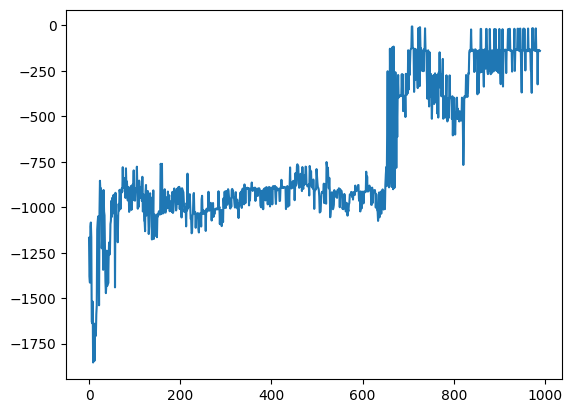

In [49]:
env = gym.make("Pendulum-v1") # , render_mode="human"
try:
    env.close()
except:
    pass
observation, info = env.reset(seed=17)
steps_per_episode = 200 # T
for episode in range(1000): # M

    action = [0]
    rewards = 0
    step = 0
    while(step < steps_per_episode):
        action = agent.choose_action(observation, env.action_space)  # this is where you would insert your policy
        
        observation, reward, terminated, truncated, info = env.step(action)

        rewards += reward
        
        agent.update(observation, reward, terminated, truncated)
        if terminated or truncated:
            break
            observation, info = env.reset()
            action = [0]
        step += 1
    if episode % 10 == 0:
        print(f"Episode: {episode}, Reward: {rewards}, Memory Size: {agent.memory.size}")
        plt.clf()
        plt.plot(np.array(scores))
        plt.savefig("training.png")
    #env.render()
    scores.append(rewards)
    
    observation, info = env.reset()
    action = [0]
    #control.reset()
env.close()


In [50]:
torch.save(agent.actor.state_dict(), "td3_actor.pth")
torch.save(agent.critic.state_dict(), "td3_critic.pth")

In [ ]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(scores))], scores)
plt.show()